#Cancer Death Rate 



## Task 1

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np

#visulization libraries
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the data


In [ ]:
#loading the data
cancer_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Training_set_label.csv" )

In [ ]:
cancer_data.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,19.0,8,481.5,50038,2704,11.1,0.0,"(48021.6, 51046.4]",48.4,49.6,46.4,"Hettinger County, North Dakota",2.25,65.9,10.8,25.0,57.4,6.8,37.1,12.2,57.4,1.1,81.2,56.0,35.7,34.7,9.9,96.032049,0.724914,0.000000,0.000000,62.511457,15.157116,160.3
1,88.0,34,486.0,59399,14844,9.7,0.0,"(54545.6, 61494.5]",41.9,41.3,43.2,"Mills County, Iowa",2.63,58.6,22.3,29.1,NaN,1.1,35.9,16.0,60.4,3.8,76.7,NaN,50.8,32.1,12.8,97.537344,0.719957,0.080743,0.040371,61.641045,3.293510,194.9
2,195.0,83,475.7,39721,25164,18.5,0.0,"(37413.8, 40362.7]",48.9,47.9,49.9,"Gladwin County, Michigan",2.30,57.2,24.9,36.2,NaN,3.5,40.2,7.6,41.2,11.0,61.6,NaN,32.1,49.8,21.6,97.576566,0.360770,0.411749,0.082350,53.978102,6.390328,196.5
3,116.0,55,496.6,30299,17917,28.1,0.0,"[22640, 34218.1]",44.2,42.7,45.2,"Fentress County, Tennessee",2.43,53.0,10.9,51.8,NaN,5.3,44.2,7.0,41.6,10.4,45.2,NaN,24.2,53.2,33.0,97.908650,0.161731,0.306731,0.340193,51.013143,5.124836,230.9
4,80.0,35,372.0,39625,14058,17.4,0.0,"(37413.8, 40362.7]",45.0,42.2,48.0,"Las Animas County, Colorado",2.36,52.2,12.6,31.2,NaN,0.2,28.3,10.5,49.3,9.2,56.6,NaN,33.4,43.0,24.7,82.672551,1.834103,0.682617,8.253465,50.566426,3.897033,162.2


### Perform Exploratory Data Analysis

In [ ]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3051 entries, 0 to 3050
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3051 non-null   float64
 1   avgDeathsPerYear         3051 non-null   int64  
 2   incidenceRate            3051 non-null   float64
 3   medIncome                3051 non-null   int64  
 4   popEst2015               3051 non-null   int64  
 5   povertyPercent           3051 non-null   float64
 6   studyPerCap              3051 non-null   float64
 7   binnedInc                3051 non-null   object 
 8   MedianAge                3051 non-null   float64
 9   MedianAgeMale            3051 non-null   float64
 10  MedianAgeFemale          3051 non-null   float64
 11  Geography                3051 non-null   object 
 12  AvgHouseholdSize         3051 non-null   float64
 13  PercentMarried           3051 non-null   float64
 14  PctNoHS18_24            

In [ ]:
cancer_data.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,19.0,8,481.5,50038,2704,11.1,0.0,"(48021.6,",48.4,49.6,46.4,"Hettinger County, North Dakota",2.25,65.9,10.8,25.0,57.4,6.8,37.1,12.2,57.4,1.1,81.2,56.0,35.7,34.7,9.9,96.032049,0.724914,0.000000,0.000000,62.511457,15.157116,160.3
1,88.0,34,486.0,59399,14844,9.7,0.0,"(54545.6,",41.9,41.3,43.2,"Mills County, Iowa",2.63,58.6,22.3,29.1,NaN,1.1,35.9,16.0,60.4,3.8,76.7,NaN,50.8,32.1,12.8,97.537344,0.719957,0.080743,0.040371,61.641045,3.293510,194.9
2,195.0,83,475.7,39721,25164,18.5,0.0,"(37413.8,",48.9,47.9,49.9,"Gladwin County, Michigan",2.30,57.2,24.9,36.2,NaN,3.5,40.2,7.6,41.2,11.0,61.6,NaN,32.1,49.8,21.6,97.576566,0.360770,0.411749,0.082350,53.978102,6.390328,196.5
3,116.0,55,496.6,30299,17917,28.1,0.0,"[22640,",44.2,42.7,45.2,"Fentress County, Tennessee",2.43,53.0,10.9,51.8,NaN,5.3,44.2,7.0,41.6,10.4,45.2,NaN,24.2,53.2,33.0,97.908650,0.161731,0.306731,0.340193,51.013143,5.124836,230.9
4,80.0,35,372.0,39625,14058,17.4,0.0,"(37413.8,",45.0,42.2,48.0,"Las Animas County, Colorado",2.36,52.2,12.6,31.2,NaN,0.2,28.3,10.5,49.3,9.2,56.6,NaN,33.4,43.0,24.7,82.672551,1.834103,0.682617,8.253465,50.566426,3.897033,162.2


In [ ]:
#checking for null values
cancer_data.isnull().sum()

avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
binnedInc                     0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
Geography                     0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            2266
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over          152
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     604
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarri

In [ ]:
#checking if we can remove the null values of we have to fill them instead
count=0
for i in cancer_data.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)
print('since it is ',round((count/len(cancer_data.index))*100), 'percent of the entire dataset the rows with missing values are filled with the mean.')

Total number of rows with missing values is  2442
since it is  80 percent of the entire dataset the rows with missing values are filled with the mean.


In [ ]:
#Filling the null values with mean
cancer_data.fillna(cancer_data.mean(),inplace=True)

In [ ]:
cancer_data.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
binnedInc                  0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
Geography                  0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctSomeCol18_24            0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
TARGET_deathRate           0
dtype: int64

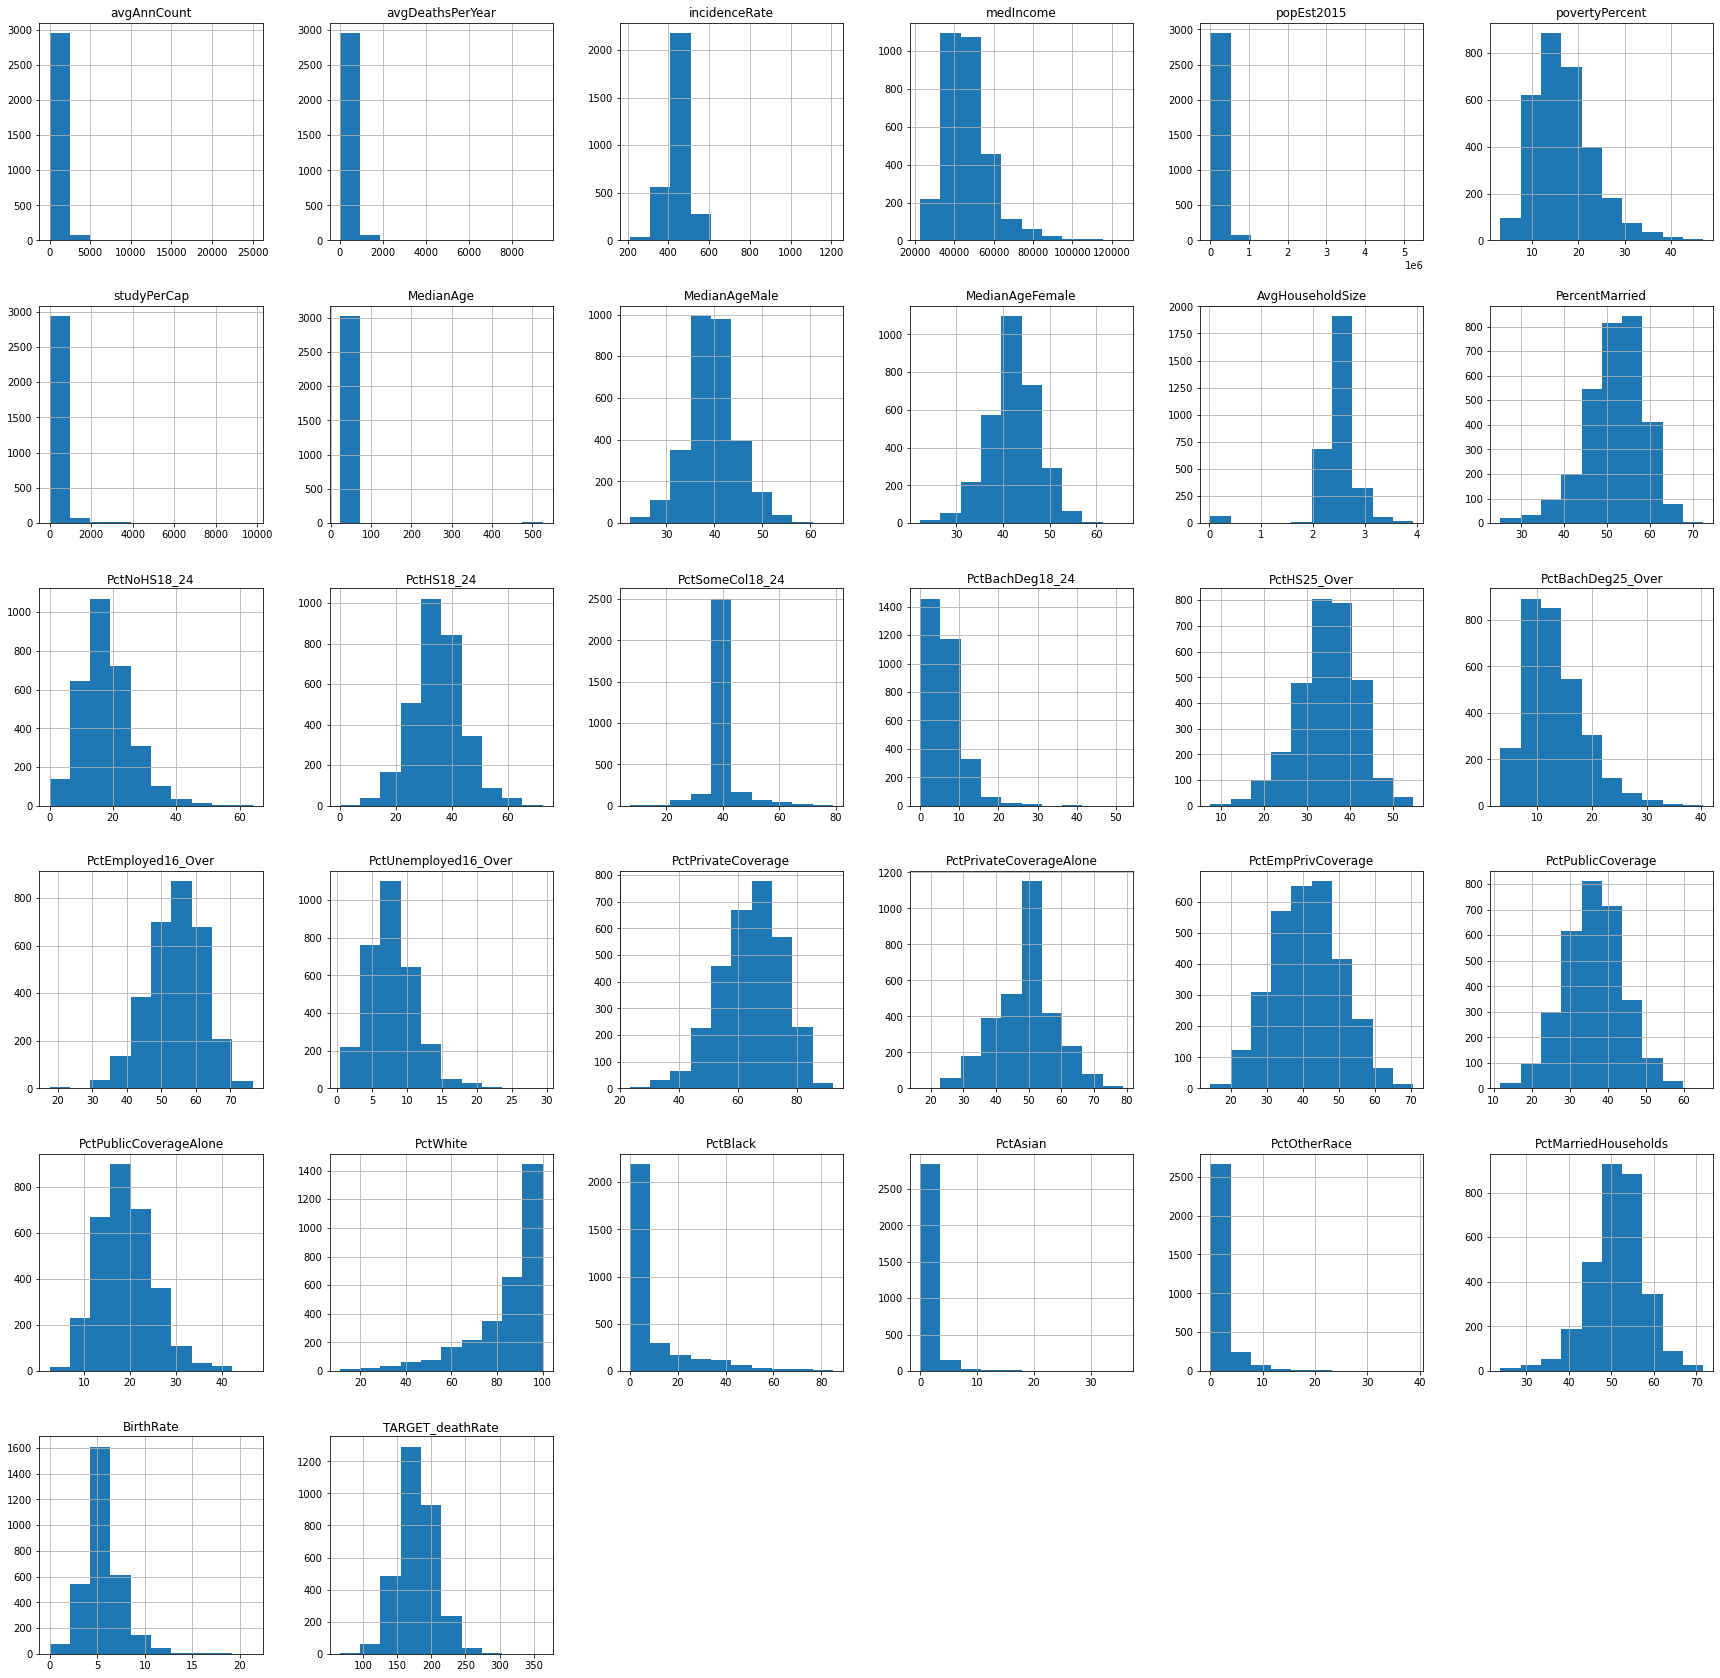

In [ ]:
#visualizing the columns
cancer_data.hist(bins=10, figsize=(30,30))
plt.show()

In [ ]:
#Dropping columns 
cancer_data.drop(['binnedInc','Geography'],axis=1,inplace=True)

In [ ]:
cancer_data.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
0,19.0,8,481.5,50038,2704,11.1,0.0,48.4,49.6,46.4,2.25,65.9,10.8,25.0,57.400000,6.8,37.1,12.2,57.4,1.1,81.2,56.000000,35.7,34.7,9.9,96.032049,0.724914,0.000000,0.000000,62.511457,15.157116,160.3
1,88.0,34,486.0,59399,14844,9.7,0.0,41.9,41.3,43.2,2.63,58.6,22.3,29.1,41.247898,1.1,35.9,16.0,60.4,3.8,76.7,48.573314,50.8,32.1,12.8,97.537344,0.719957,0.080743,0.040371,61.641045,3.293510,194.9
2,195.0,83,475.7,39721,25164,18.5,0.0,48.9,47.9,49.9,2.30,57.2,24.9,36.2,41.247898,3.5,40.2,7.6,41.2,11.0,61.6,48.573314,32.1,49.8,21.6,97.576566,0.360770,0.411749,0.082350,53.978102,6.390328,196.5
3,116.0,55,496.6,30299,17917,28.1,0.0,44.2,42.7,45.2,2.43,53.0,10.9,51.8,41.247898,5.3,44.2,7.0,41.6,10.4,45.2,48.573314,24.2,53.2,33.0,97.908650,0.161731,0.306731,0.340193,51.013143,5.124836,230.9
4,80.0,35,372.0,39625,14058,17.4,0.0,45.0,42.2,48.0,2.36,52.2,12.6,31.2,41.247898,0.2,28.3,10.5,49.3,9.2,56.6,48.573314,33.4,43.0,24.7,82.672551,1.834103,0.682617,8.253465,50.566426,3.897033,162.2


### Separate the Input and Target Features of the data

In [ ]:
# Splitting data into Input and Target Variable

y = cancer_data[['TARGET_deathRate']]  # target variable i.e diabetic or not
X = cancer_data.drop(['TARGET_deathRate'], axis=1)  # input variables

### Split the data into Train and Test Sets

In [ ]:
# Split into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=1)

## Task 2

### Perform Data Preparation Steps

In [ ]:
cancer_data.TARGET_deathRate

0       160.3
1       194.9
2       196.5
3       230.9
4       162.2
        ...  
3046    146.2
3047    183.7
3048    128.7
3049    209.2
3050    167.7
Name: TARGET_deathRate, Length: 3051, dtype: float64

In [ ]:
cancer_data.describe()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate,TARGET_deathRate
count,3051.000000,3051.000000,3051.000000,3051.000000,3.051000e+03,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000,3051.000000
mean,570.668154,176.000983,449.007042,46902.917076,9.495799e+04,16.880367,158.695936,44.303540,39.600885,42.234579,2.473048,51.885480,18.225139,34.920190,41.247898,6.131957,34.909440,13.212750,54.115626,7.841069,64.519338,48.573314,41.342347,36.287545,19.198820,84.005243,9.166570,1.198561,1.864829,51.355837,5.608851,178.909767
std,1250.546532,445.042777,52.886386,11902.460659,2.761007e+05,6.340462,544.035590,38.704107,5.177629,5.253474,0.429926,6.812846,8.105799,9.021475,5.631254,4.552222,7.015728,5.360342,8.059009,3.454863,10.511932,8.965308,9.327793,7.748442,6.023164,16.126982,14.676772,2.369931,3.235204,6.524964,1.955201,27.570075
min,6.000000,3.000000,211.100000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,22.300000,0.022100,25.100000,0.000000,0.000000,7.100000,0.000000,7.500000,3.200000,17.600000,0.400000,23.400000,16.800000,14.300000,11.800000,2.600000,11.008762,0.000000,0.000000,0.000000,23.915652,0.000000,66.300000
25%,80.000000,29.000000,421.800000,38752.000000,1.236850e+04,12.200000,0.000000,37.900000,36.400000,39.200000,2.370000,47.800000,12.800000,29.300000,41.247898,3.100000,30.650000,9.300000,48.900000,5.500000,57.500000,43.200000,34.700000,31.000000,14.900000,78.012571,0.616576,0.261748,0.282825,47.736828,4.499936,161.400000
50%,171.000000,62.000000,453.549422,45098.000000,2.677700e+04,15.900000,0.000000,41.000000,39.500000,42.400000,2.500000,52.500000,17.200000,34.700000,41.247898,5.300000,35.400000,12.300000,54.115626,7.600000,65.300000,48.573314,41.300000,36.300000,18.800000,90.318790,2.276756,0.557031,0.791571,51.757925,5.384471,178.300000
75%,508.000000,148.000000,481.300000,52410.500000,6.853600e+04,20.400000,86.581336,43.900000,42.500000,45.300000,2.630000,56.500000,22.600000,40.700000,41.247898,8.100000,39.700000,16.100000,60.050000,9.700000,72.200000,53.900000,47.700000,41.400000,23.000000,95.577396,10.326954,1.189955,2.080241,55.465803,6.473896,195.500000
max,24965.000000,9445.000000,1206.900000,125635.000000,5.238216e+06,47.000000,9762.308998,525.600000,64.700000,65.700000,3.930000,72.500000,64.100000,72.500000,79.000000,51.800000,54.800000,40.400000,76.500000,29.400000,92.300000,78.900000,70.700000,65.100000,46.600000,100.000000,84.866024,35.640183,38.743747,71.703057,21.326165,362.800000


## Task 3

### Build any Machine Learning Model 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# define random forest regressor
forest = RandomForestRegressor(n_jobs=-1, max_depth=5, random_state=1)
 
forest.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [ ]:
#Prediction
predictions = forest.predict(X_test)

In [ ]:
y_test.values

array([[148.9],
       [129.3],
       [153.6],
       ...,
       [155.3],
       [183.5],
       [183.9]])

In [ ]:
predictions

array([168.48598572, 136.92470893, 161.99505938, ..., 154.46087694,
       199.79215712, 176.48901716])

### Evaluate your model with various Evaluation Metrics

In [ ]:
forest.score(X_test, y_test)*100

56.48614994296442

In [ ]:
# import metrics library
from sklearn import metrics

# print result of MAE
print(metrics.mean_absolute_error(y_test,predictions))

#print result of MSE
print(metrics.mean_squared_error(y_test,predictions))

#print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test,predictions))) 

13.79385791132411
328.9208336821646
18.136174725728814


### Try out other Machine Learning Models and Evaluate them

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# define decision tree regressor
tree = DecisionTreeRegressor()
 
tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
#Prediction
predictdt = tree.predict(X_test)

In [ ]:
y_test.values

array([[148.9],
       [129.3],
       [153.6],
       ...,
       [155.3],
       [183.5],
       [183.9]])

In [ ]:
predictdt

array([178.1, 129.3, 153.6, ..., 132.3, 198.2, 182.2])

In [ ]:
tree.score(X_test, y_test)*100

41.38070851940551

In [ ]:
# import metrics library
from sklearn import metrics

# print result of MAE
print(metrics.mean_absolute_error(y_test,predictdt))

#print result of MSE
print(metrics.mean_squared_error(y_test,predictdt))

#print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test,predictdt))) 

12.741410129096327
443.10274081429986
21.05000572005385


In [ ]:
#Define a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression(normalize = True)
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
#Prediction
predictlr = model.predict(X_test)

In [ ]:
model.score(X_test, y_test)*100

54.385120378744354

In [ ]:
# import metrics library
from sklearn import metrics

# print result of MAE
print(metrics.mean_absolute_error(y_test,predictlr))

#print result of MSE
print(metrics.mean_squared_error(y_test,predictlr))

#print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test,predictlr))) 

13.548911283100987
344.8024988289699
18.56885830709497


In [ ]:
#Defining a gradiest boosting model
from sklearn.ensemble import GradientBoostingRegressor

model1 = GradientBoostingRegressor()
model1.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
#Prediction
predictgb = model1.predict(X_test)
predictgb

array([160.96663848, 139.80478005, 154.43456019, ..., 148.73387488,
       198.90628066, 173.61387359])

In [ ]:
model1.score(X_test, y_test)*100

68.41649664358815

In [ ]:
# import metrics library
from sklearn import metrics

# print result of MAE
print(metrics.mean_absolute_error(y_test,predictgb))

#print result of MSE
print(metrics.mean_squared_error(y_test,predictgb))

#print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test,predictgb))) 

11.675111885114717
238.73944137275336
15.451195467430777


## Task 4

### Perform Hyperparameter Tuning

In [ ]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
gbc = GradientBoostingRegressor()
parameters = {
    'n_estimators': [5, 50, 100, 150, 250],
    'max_depth': [2, 3, 4, 8, 16, 32, None],
    'learning_rate': [0.03, 0.1, 0.3, 1]
}
rs = RandomizedSearchCV(gbc, parameters, cv=5,n_iter=20)
rs.fit(X_train, y_train)

print_results(rs)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

BEST PARAMS: {'n_estimators': 150, 'max_depth': 4, 'learning_rate': 0.1}

0.417 (+/-0.151) for {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 1}
0.398 (+/-0.055) for {'n_estimators': 100, 'max_depth': None, 'learning_rate': 0.03}
0.275 (+/-0.152) for {'n_estimators': 100, 'max_depth': None, 'learning_rate': 1}
0.276 (+/-0.127) for {'n_estimators': 250, 'max_depth': 16, 'learning_rate': 1}
0.159 (+/-0.037) for {'n_estimators': 5, 'max_depth': 16, 'learning_rate': 0.03}
0.398 (+/-0.059) for {'n_estimators': 100, 'max_depth': 32, 'learning_rate': 0.03}
0.375 (+/-0.049) for {'n_estimators': 50, 'max_depth': None, 'learning_rate': 0.1}
0.374 (+/-0.055) for {'n_estimators': 5, 'max_depth': 32, 'learning_rate': 0.1}
0.458 (+/-0.091) for {'n_estimators': 150, 'max_depth': 16, 'learning_rate': 0.03}
0.297 (+/-0.136) for {'n_estimators': 150, 'max_depth': 4, 'learning_rate': 1}
0.351 (+/-0.115) for {'n_estimators': 150, 'max_depth': None, 'learning_rate': 0.3}
0.42 (+/-0.072) for {'n_esti

In [ ]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
gbc = GradientBoostingRegressor()
parameters = {
    'n_estimators': [80, 90, 100, 125, 150],
    'max_depth': [2,3,4,5,8,16,None],
    'learning_rate': [0.03, 0.1, 0.3, 0.5]
}
cv = GridSearchCV(gbc, parameters, cv=5)
cv.fit(X_train, y_train)

print_results(cv)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

BEST PARAMS: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}

0.448 (+/-0.044) for {'learning_rate': 0.03, 'max_depth': 2, 'n_estimators': 80}
0.461 (+/-0.045) for {'learning_rate': 0.03, 'max_depth': 2, 'n_estimators': 90}
0.472 (+/-0.044) for {'learning_rate': 0.03, 'max_depth': 2, 'n_estimators': 100}
0.49 (+/-0.047) for {'learning_rate': 0.03, 'max_depth': 2, 'n_estimators': 125}
0.502 (+/-0.05) for {'learning_rate': 0.03, 'max_depth': 2, 'n_estimators': 150}
0.504 (+/-0.044) for {'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 80}
0.516 (+/-0.048) for {'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 90}
0.525 (+/-0.052) for {'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 100}
0.543 (+/-0.061) for {'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 125}
0.555 (+/-0.07) for {'learning_rate': 0.03, 'max_depth': 3, 'n_estimators': 150}
0.544 (+/-0.05) for {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 80}
0.557 (+/-0.05) for {'learning_ra

In [ ]:
cv.best_score_

0.673112065757304

In [ ]:
pred = cv.best_estimator_.predict(test_data)

In [ ]:
pred

array([135.61696765, 186.95938739, 157.03894945, 156.53622262,
       169.68448507, 181.00788293, 187.94501472, 163.93138698,
       160.37422924, 165.1299434 , 160.27120519, 191.98286187,
       164.44002799, 164.12341076, 200.23907622, 162.1501943 ,
       191.95913356, 169.89469066, 180.08748404, 171.21824115,
       177.10972295, 226.1908119 , 182.17708703, 182.26047953,
       132.28331504, 171.24772093, 167.42506007, 255.88935136,
       156.80434841, 180.82263648, 175.44663071, 171.39246923,
       163.61357394, 159.12546092, 141.47710912, 164.31932134,
       139.06683331, 190.47965147, 164.14223527, 180.53575783,
       203.39573193, 174.33076379, 171.96364443, 178.89693   ,
       165.29464975, 137.3005284 , 179.71017488, 187.53524754,
       195.37675283, 171.21976633, 148.45696975, 170.17251129,
       182.0433275 , 175.06691548, 166.51859134, 182.001964  ,
       181.77809129, 192.86319688, 172.45729833, 166.88240702,
       167.99055431, 181.98946271, 183.99040457, 179.21

## Task 5

### Use any Feature Selection Technique and observe if the model created by selected features performs better than the previous model

In [ ]:
 pip install boruta

     |████████████████████████████████| 61kB 4.9MB/s 


In [ ]:
# Applying boruta on the gradient boosting model as it performed well accept other models
from boruta import BorutaPy
#'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150
gbc = GradientBoostingRegressor(random_state=1, n_estimators=150, max_depth=5,learning_rate=0.1)
boruta_selector = BorutaPy(gbc, n_estimators='auto', verbose=2, random_state=1)   # initialize the boruta selector
boruta_selector.fit(np.array(X_train), np.array(y_train))       # fitting the boruta selector to get all relavent features. 
# NOTE: BorutaPy accepts numpy arrays only.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	31
Rejected: 	0


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	8 / 100
Confirmed: 	19
Tentative: 	9
Rejected: 	3


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	9 / 100
Confirmed: 	19
Tentative: 	9
Rejected: 	3


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	10 / 100
Confirmed: 	19
Tentative: 	9
Rejected: 	3


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	11 / 100
Confirmed: 	19
Tentative: 	9
Rejected: 	3


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	12 / 100
Confirmed: 	20
Tentative: 	8
Rejected: 	3


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	13 / 100
Confirmed: 	20
Tentative: 	8
Rejected: 	3


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	14 / 100
Confirmed: 	20
Tentative: 	8
Rejected: 	3


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	15 / 100
Confirmed: 	20
Tentative: 	8
Rejected: 	3


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	16 / 100
Confirmed: 	20
Tentative: 	8
Rejected: 	3


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	17 / 100
Confirmed: 	20
Tentative: 	8
Rejected: 	3


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	18 / 100
Confirmed: 	20
Tentative: 	8
Rejected: 	3


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	19 / 100
Confirmed: 	20
Tentative: 	8
Rejected: 	3


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	20 / 100
Confirmed: 	20
Tentative: 	8
Rejected: 	3


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	21 / 100
Confirmed: 	20
Tentative: 	8
Rejected: 	3


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	22 / 100
Confirmed: 	20
Tentative: 	8
Rejected: 	3


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	23 / 100
Confirmed: 	20
Tentative: 	8
Rejected: 	3


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	24 / 100
Confirmed: 	20
Tentative: 	8
Rejected: 	3


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	25 / 100
Confirmed: 	20
Tentative: 	8
Rejected: 	3


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	26 / 100
Confirmed: 	20
Tentative: 	8
Rejected: 	3


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	27 / 100
Confirmed: 	20
Tentative: 	8
Rejected: 	3


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	28 / 100
Confirmed: 	20
Tentative: 	8
Rejected: 	3


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	29 / 100
Confirmed: 	20
Tentative: 	7
Rejected: 	4


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	30 / 100
Confirmed: 	20
Tentative: 	7
Rejected: 	4


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	31 / 100
Confirmed: 	20
Tentative: 	7
Rejected: 	4


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	32 / 100
Confirmed: 	20
Tentative: 	7
Rejected: 	4


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	33 / 100
Confirmed: 	20
Tentative: 	7
Rejected: 	4


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	34 / 100
Confirmed: 	20
Tentative: 	7
Rejected: 	4


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	35 / 100
Confirmed: 	20
Tentative: 	7
Rejected: 	4


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	36 / 100
Confirmed: 	20
Tentative: 	7
Rejected: 	4


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	37 / 100
Confirmed: 	20
Tentative: 	7
Rejected: 	4


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	38 / 100
Confirmed: 	20
Tentative: 	7
Rejected: 	4


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	39 / 100
Confirmed: 	20
Tentative: 	7
Rejected: 	4


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	40 / 100
Confirmed: 	20
Tentative: 	7
Rejected: 	4


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	41 / 100
Confirmed: 	20
Tentative: 	7
Rejected: 	4


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	42 / 100
Confirmed: 	20
Tentative: 	7
Rejected: 	4


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	43 / 100
Confirmed: 	20
Tentative: 	7
Rejected: 	4


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	44 / 100
Confirmed: 	20
Tentative: 	7
Rejected: 	4


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	45 / 100
Confirmed: 	20
Tentative: 	7
Rejected: 	4


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	46 / 100
Confirmed: 	21
Tentative: 	6
Rejected: 	4


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	47 / 100
Confirmed: 	21
Tentative: 	6
Rejected: 	4


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	48 / 100
Confirmed: 	21
Tentative: 	6
Rejected: 	4


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	49 / 100
Confirmed: 	21
Tentative: 	6
Rejected: 	4


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	50 / 100
Confirmed: 	21
Tentative: 	6
Rejected: 	4


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	51 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	52 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	53 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	54 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	55 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	56 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	57 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	58 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	59 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	60 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	61 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	62 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	63 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	64 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	65 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	66 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	67 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	68 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	69 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	70 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	71 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	72 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	73 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	74 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	75 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	76 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	77 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	78 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	79 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	80 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	81 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	82 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	83 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	84 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	85 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	86 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	87 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	88 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	89 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	90 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	91 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	92 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	93 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	94 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	95 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	96 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	97 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	98 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration: 	99 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


BorutaPy finished running.

Iteration: 	100 / 100
Confirmed: 	21
Tentative: 	5
Rejected: 	5


BorutaPy(alpha=0.05,
         estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                             criterion='friedman_mse',
                                             init=None, learning_rate=0.1,
                                             loss='ls', max_depth=5,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=144,
                                             n_iter_no_change=None,
                                             presort='deprecated',
                 

In [ ]:
#Getting a detailed summary of the boruta model output
print("Selected Features: ", boruta_selector.support_)    # check selected features
 

print("Ranking: ",boruta_selector.ranking_)               # check ranking of features

print("No. of significant features: ", boruta_selector.n_features_)

Selected Features:  [ True  True  True  True  True  True False False False  True  True  True
 False  True False False  True  True  True  True  True False False False
  True  True  True  True  True False  True]
Ranking:  [1 1 1 1 1 1 6 2 2 1 1 1 3 1 7 2 1 1 1 1 1 5 4 2 1 1 1 1 1 2 1]
No. of significant features:  21


In [ ]:
selected_rf_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':boruta_selector.ranking_})
selected_rf_features.sort_values(by='Ranking')

,Feature,Ranking
0,avgAnnCount,1
28,PctOtherRace,1
27,PctAsian,1
26,PctBlack,1
25,PctWhite,1
24,PctPublicCoverageAlone,1
20,PctPrivateCoverage,1
19,PctUnemployed16_Over,1
18,PctEmployed16_Over,1
17,PctBachDeg25_Over,1


In [ ]:
#Splitting the data again with the selected columns given by boruta
X_important_train = boruta_selector.transform(np.array(X_train))
X_important_test = boruta_selector.transform(np.array(X_test))

In [ ]:

# Create a new gradient boosting regressor for the most important features
gb_important = GradientBoostingRegressor(random_state=1, n_estimators=1000)

# Train the new regressor on the new dataset containing the most important features
gb_important.fit(X_important_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
#Prediction
predict = gb_important.predict(X_important_test)

In [ ]:
predict

array([157.32037088, 130.9140985 , 150.57229374, ..., 151.97619778,
       194.53843629, 181.46606821])

In [ ]:
# import metrics library
from sklearn import metrics

# print result of MAE
print(metrics.mean_absolute_error(y_test,predict))

#print result of MSE
print(metrics.mean_squared_error(y_test,predict))

#print result of RMSE
print(np.sqrt(metrics.mean_squared_error(y_test,predict))) 

7.986953844789743
140.78408558679035
11.865246966953126


In [ ]:
# As we see the gradient boosting performed well so we are using it to do our prediction

In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/cancer_death_rate/Testing_set_label.csv')
#All the pre processing steps were done on the test data as well and final prediction was obtained

In [ ]:
test_data.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,MedianAgeMale,MedianAgeFemale,Geography,AvgHouseholdSize,PercentMarried,PctNoHS18_24,PctHS18_24,PctSomeCol18_24,PctBachDeg18_24,PctHS25_Over,PctBachDeg25_Over,PctEmployed16_Over,PctUnemployed16_Over,PctPrivateCoverage,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,2092.000000,763,341.000000,34368,842304,33.5,42.739913,"(34218.1, 37413.8]",28.8,27.4,30.1,"Hidalgo County, Texas",3.62,51.0,22.3,29.0,NaN,5.1,23.2,11.9,52.2,9.9,32.6,NaN,22.9,37.3,28.2,91.409724,0.620104,1.041848,5.804689,56.335344,6.825886
1,94.000000,41,445.200000,35615,16704,21.5,0.000000,"(34218.1, 37413.8]",41.5,40.9,42.1,"Barbour County, West Virginia",2.68,52.0,9.8,36.1,45.8,8.3,47.1,7.9,46.5,9.0,55.6,40.1,36.5,44.8,26.4,96.844181,0.836770,0.376547,0.029885,55.288859,2.292861
2,126.000000,43,425.700000,76672,32154,7.6,31.100330,"(61494.5, 125635]",35.0,34.2,36.0,"Stark County, North Dakota",2.44,55.8,13.0,26.8,NaN,10.0,30.5,17.5,71.4,2.8,83.3,68.0,55.9,19.6,5.9,92.626100,1.114294,1.257510,1.844348,52.614465,10.502567
3,1962.667684,16,453.549422,45856,5428,11.4,0.000000,"(45201, 48021.6]",44.7,44.2,45.5,"Phillips County, Kansas",2.29,60.5,33.2,13.9,45.3,7.6,35.3,15.5,63.1,4.3,75.8,55.3,44.5,33.4,15.5,96.855117,0.381749,0.181785,0.163607,55.044700,9.342231
4,1962.667684,4,453.549422,53739,1670,10.9,0.000000,"(51046.4, 54545.6]",535.2,44.7,44.4,"Lane County, Kansas",2.07,55.9,25.2,31.1,NaN,3.0,29.7,15.5,67.9,2.4,78.2,56.7,48.6,29.2,11.2,98.327360,0.358423,0.000000,0.000000,47.826087,10.029499


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              762 non-null    float64
 1   avgDeathsPerYear         762 non-null    int64  
 2   incidenceRate            762 non-null    float64
 3   medIncome                762 non-null    int64  
 4   popEst2015               762 non-null    int64  
 5   povertyPercent           762 non-null    float64
 6   studyPerCap              762 non-null    float64
 7   MedianAge                762 non-null    float64
 8   MedianAgeMale            762 non-null    float64
 9   MedianAgeFemale          762 non-null    float64
 10  AvgHouseholdSize         762 non-null    float64
 11  PercentMarried           762 non-null    float64
 12  PctNoHS18_24             762 non-null    float64
 13  PctHS18_24               762 non-null    float64
 14  PctSomeCol18_24          7

In [ ]:
#null values were removed
#And columns were removed

In [ ]:
test_data.drop(columns=['PctPublicCoverage','PctBachDeg18_24','MedianAge','MedianAgeMale','PctMarriedHouseholds','PctNoHS18_24','PctEmpPrivCoverage','PctPrivateCoverageAlone','studyPerCap','PctSomeCol18_24'],axis=1,inplace=True)

In [ ]:
target = gb_important.predict(test_data)
target

array([124.63098213, 196.84282211, 153.42204997, 157.43910368,
       158.19940949, 179.44755409, 187.34240079, 168.57080545,
       160.26224518, 167.33377792, 167.02264141, 186.32339519,
       178.19283225, 161.24477601, 195.54053863, 171.66702477,
       191.34468818, 178.95422408, 175.16755928, 166.62811047,
       171.51312864, 227.98439599, 175.61191276, 177.68337172,
       129.2274887 , 181.64854395, 152.32354523, 265.68763815,
       161.05733959, 177.71942177, 168.83852795, 170.39291061,
       161.20854011, 162.78416207, 134.01160395, 169.18190694,
       138.46942145, 203.55116022, 164.80212711, 180.55867104,
       199.52896007, 183.40589035, 164.32201743, 187.70459712,
       173.09505938, 141.35776704, 188.20200981, 190.2889524 ,
       192.67444869, 175.20058841, 143.08106746, 166.24154668,
       180.89819184, 162.52783977, 145.95744675, 184.73533816,
       188.0538367 , 184.49605211, 175.42526489, 168.87271624,
       164.45188077, 182.94097236, 189.68900503, 182.27

In [ ]:
res = pd.DataFrame(target) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("prediction_results.csv", index = False)  